<a href="https://colab.research.google.com/github/moushumipriya/AgroVet-Sales-Forecasting-ML/blob/main/AgroVet_Sales_Forecasting_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [53]:
df = pd.read_csv("agro_vet_sales_data.csv")
print(df.shape)
df.head()


(363, 9)


,Date,Product_Name,Category,Region,Price_BDT,Quantity_Sold,Promotion,Total_Sales,Weather_Index
0,2023-10-01,Cow Vaccine,Medicine,Sylhet,1085,379,No,411215,0.37
1,2025-08-01,Cattle Mineral Mix,Supplement,Rajshahi,1069,384,Yes,410496,0.70
2,2025-01-01,Fish Supplement,Supplement,Rangpur,714,464,No,331296,0.46
3,2023-10-01,Cattle Mineral Mix,Supplement,Dhaka,645,275,Yes,177375,0.64
4,2023-07-01,Goat Tonic,Supplement,Rangpur,662,351,No,232362,0.34


In [54]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           363 non-null    object 
 1   Product_Name   363 non-null    object 
 2   Category       363 non-null    object 
 3   Region         363 non-null    object 
 4   Price_BDT      363 non-null    int64  
 5   Quantity_Sold  363 non-null    int64  
 6   Promotion      363 non-null    object 
 7   Total_Sales    363 non-null    int64  
 8   Weather_Index  363 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 25.7+ KB


,0
Date,0
Product_Name,0
Category,0
Region,0
Price_BDT,0
Quantity_Sold,0
Promotion,0
Total_Sales,0
Weather_Index,0


In [55]:
df = df.dropna()
df = df[df['Total_Sales'] > 0]


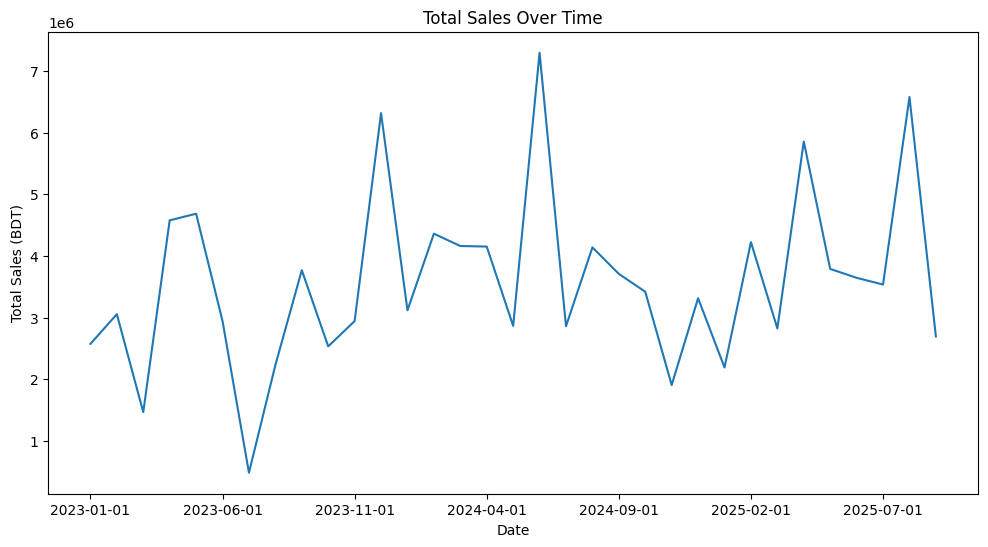

In [56]:
# Sales trend over time
plt.figure(figsize=(12,6))
df.groupby('Date')['Total_Sales'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (BDT)")
plt.show()




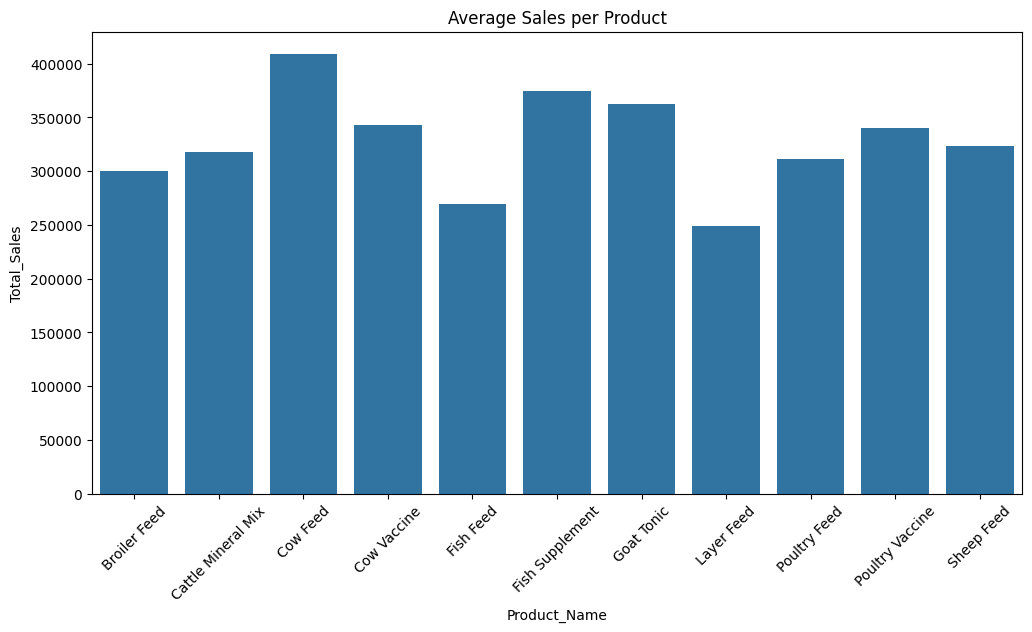

In [57]:
# Product-wise average sales
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby('Product_Name')['Total_Sales'].mean().reset_index(),
            x='Product_Name', y='Total_Sales')
plt.title("Average Sales per Product")
plt.xticks(rotation=45)
plt.show()


In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Is_Promotion'] = df['Promotion'].map({'Yes':1, 'No':0})
df = df.drop(columns=['Promotion', 'Date'])


In [59]:
le = LabelEncoder()
for col in ['Product_Name', 'Category', 'Region']:
    df[col] = le.fit_transform(df[col])


In [60]:
X = df.drop(columns=['Total_Sales'])
y = df['Total_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [63]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 9701.292534246577
RMSE: 14630.100952768451
R² Score: 0.9937177664363979


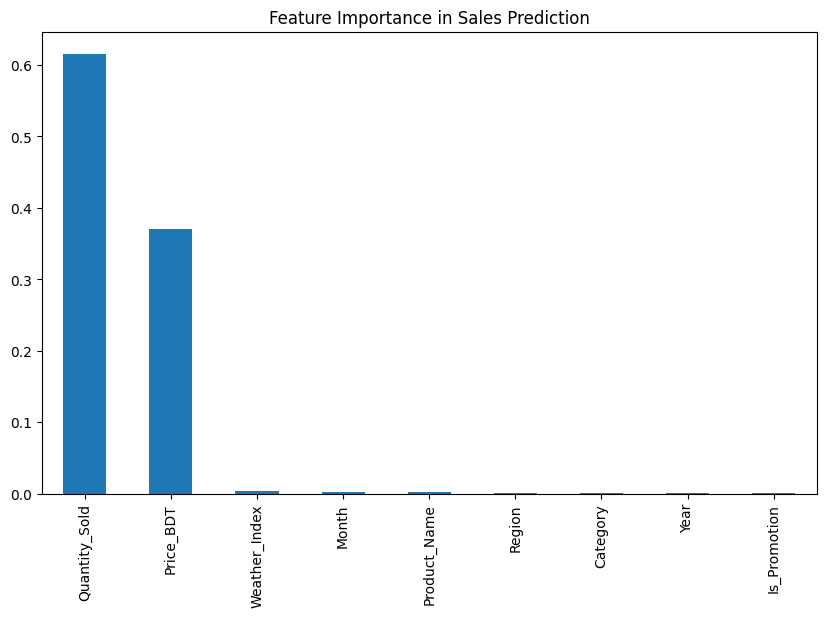

In [64]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Feature Importance in Sales Prediction")
plt.show()


In [65]:
# Future prediction (example)
future_data = X_test.iloc[:5].copy()
future_data['Month'] = (future_data['Month'] % 12) + 1  # next month
next_month_pred = model.predict(future_data)
print("Predicted next month sales (sample):")
print(next_month_pred)


Predicted next month sales (sample):
[799065.42  770375.995 805784.945 770375.995 772079.14 ]


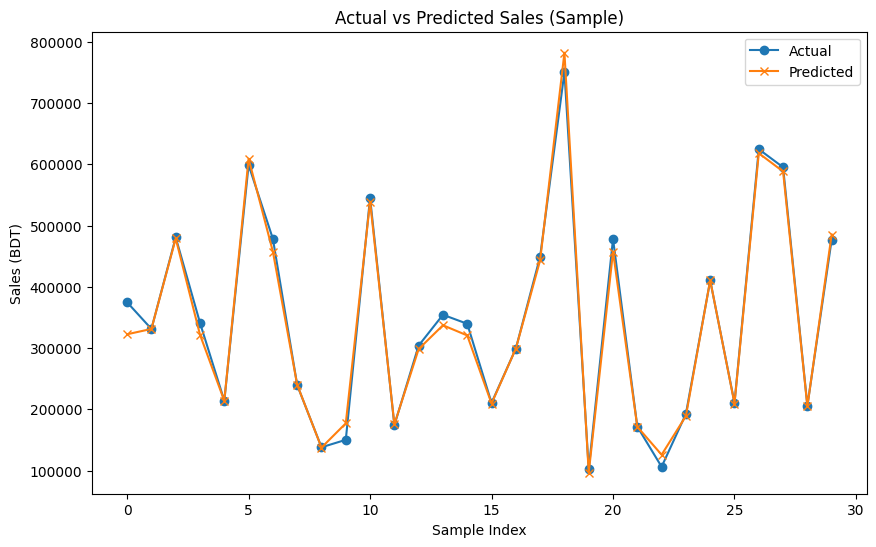

In [66]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:30], label='Actual', marker='o')
plt.plot(y_pred[:30], label='Predicted', marker='x')
plt.title("Actual vs Predicted Sales (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Sales (BDT)")
plt.legend()
plt.show()


 Business Insights

 Top features influencing sales (from feature importance).
 Seasonal trend shows which month has high demand.
Promotion impact measurable.
 Can help agro/vet companies optimize inventory & marketing.